# Monte Carlo for maths and quantitative finance   

## The recipe

1. Simulate the underlying asset under the risk-neutral random walk.<br>
2. Calculate the option payoff for the choice of derivative security. Repeat for several price paths.<br>
3. Average the discounted payoff.

### Generate Price Paths
Simulating price paths plays an important role in the valuation of derivatives and it is always prudent to create a separate path function.

### Euluer-Maruyama Method
Consider a a general SDE satfisfied by $X_t$
\begin{equation}
dX_t = a(X_t, t) dt + b(X_t, t) dW_t
\end{equation}
Simplest scheme to solve above is to use the Euler-Maruyama method
\begin{equation}
\int^{t_n+1}_{t_n} dX_s = \int^{t_n+1}_{t_n} a(X_s, s) ds + \int^{t_n+1}_{t_n} b(X_s, s) dW_s 
\end{equation}
\begin{equation}
X_{n+1} = X_n + \int^{t_n+1}_{t_n} a(X_s, s) ds + \int^{t_n+1}_{t_n} b(X_s, s) dW_s 
\end{equation}
\begin{equation}
\int^{t_n+1}_{t_n} a(X_s, s) ds \approx a(t_n, X_n) \int^{t_n+1}_{t_n} ds = a(t_n, X_n) \delta t
\end{equation}
\begin{equation}
\int^{t_n+1}_{t_n} b(X_s, s) dW_s \approx b(t_n, X_n) \int^{t_n+1}_{t_n} dW_s = b(t_n, X_n) \Delta W_n
\end{equation}
\begin{equation}
X_{n+1} = X_n + a(t_n, X_n) \delta t +  b(t_n, X_n) \Delta W_n \quad \text{where} \quad \Delta W_n = (W_{n+1} - W_n)
\end{equation}

### Simulating Equity Prices

Simulate the asset price. We can do each complete price path over the time horizon to expiry $T$. If the option is path independent we can obtain an explicit solution for a GBM under the risk neutral measure $\mathbb {Q}$. More on this in your later courses. 


\begin{equation*}
   dS_{t} = rS_{t}dt + σS_{t}dW_{t} 
\end{equation*}

where $S_{t}$ is the price of the underlying at time $t$, σ is constant volatility, $r$ is the constant risk-free interest rate and $W_{t}$ is a Brownian motion under $\mathbb {Q}$.<br>

Applying Euler-Maruyama to write the above in discrete form where $\phi \sim N(0,1)$
\begin{equation*}
   S_{i+1} = S_{i} (1+r{\delta}t+{\sigma}{\sqrt{\delta}t}{\phi})
\end{equation*}
Once the simulations are done, a large number of path dependent options can be priced.
Use the expected value of the discounted payoff under the risk-neutral density $\mathbb{Q}$
$$
V(S,t) =\mathbb{E^{\mathbb{Q}}}[e^{-\int\nolimits_{t}^{T}r_{\tau }d\tau} {\mathrm {Payoff}(S)}]$$


### Closed form solution
If we now consider $S$ which follows a lognormal random walk, i.e. $V=\log
(S)$ then
\begin{equation}
d(\log(S))=\left( \mu -\frac{1}{2}\sigma ^{2}\right) dt+\sigma
dW_{t}
\end{equation}
Integrating both sides over a given time horizon ( between $t_{0}$ and $T$ )
\begin{equation}
\int_{t_{0}}^{T}d(\log(S))=\int_{t_{0}}^{T}\left( \mu -\frac{1%
}{2}\sigma ^{2}\right) dt+\int_{t_{0}}^{T}\sigma dW\text{ }\left(
T>t_{0}\right)
\end{equation}
we obtain

\begin{equation}
\log \frac{S\left( T\right) }{S\left( t_{0}\right) }=\left( \mu -\frac{1}{2}%
\sigma ^{2}\right) \left( T-t_{0}\right) +\sigma \left( W\left( T\right)
-W\left( t_{0}\right) \right)
\end{equation}
Assuming at $t_{0}=0$, $W(0) =0$ and $S(0) =S_{0}$ the exact solution becomes

\begin{equation}
S_{T}=S_{0}\exp \left\{ \left( \mu -\frac{1}{2}\sigma ^{2}\right) T+\sigma
\phi \sqrt{T}\right\} \text{.} 
\end{equation}

Depending on the timescales involved we can write as 

\begin{equation*}
   S_{t+{\delta}t} = S_{t} \exp{((r-\frac{1}2{\sigma}^2){\delta}t +{\sigma}{\sqrt{\delta}t}{\phi})}
\end{equation*}

### Import Required Libraries

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
# Libraries for plotting
import matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly as py
cf.set_config_file(offline=True)
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

from ipywidgets import interact

# Plot settings
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0


# Set max row to 300
pd.set_option('display.max_rows', 300)

## Simulating the underlying
Here we write a function for simulating a stock

In [3]:
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):
    
    # Set the random seed for reproducibility
    # Same seed leads to the same set of random values
    np.random.seed(101) 

    # Read parameters
    S0 = s0         # initial spot level
    r = mu          # mu = rf in risk neutral framework 
    T = horizon     # time horizion
    t = timesteps   # number of time steps
    n = n_sims      # number of simulation
    
    # Define dt
    dt = T/t        # length of time interval  
    
    # Simulating 'n' asset price paths with 't' timesteps
    S = np.zeros((t, n))
    S[0] = S0

    for i in range(0, t-1):
        phi = np.random.standard_normal(n)                                                   # psuedo random numbers
        S[i+1] = S[i] * (1 + r * dt + sigma * np.sqrt(dt) * phi)                            # E-M method
        # S[i+1] = S[i] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * phi)         # alternate form
       # print(S)
        
    return S

Note this is the asset, so does not have reference to the contact features, strike and expiry.

In [5]:
# Plot initial 100 simulated path using matplotlib
n = 10
S =  simulate_path(100, 0.05, 0.2, 1, 252, n)

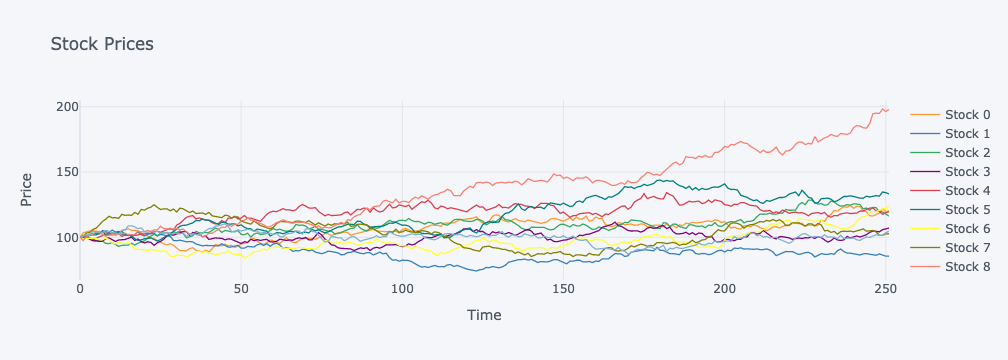

In [115]:
columns = [f'Stock {x}' for x in range(n)]
df = pd.DataFrame(S, columns=columns)
df.iplot(title='Stock Prices', yTitle='Price', xTitle='Time')

In [50]:
fig = go.FigureWidget()
S =  simulate_path(100, 0.05, 0.2, 1, 252, 10)
x = np.arange(len(S))
y = np.mean(S, axis=1)
scatter = fig.add_scatter(x=x, y=y)
fig.layout = dict(height=600)

@interact(r=(0, 1, 0.01), vol=(0, 1, 0.01), s0=(1, 500, 5), T=(0, 10, 0.25), ns=(1, 1000, 10), n=(1, 10000, 100))
def update(r=0.05, vol=0.20, s0 =100, T=1, ns=250, n=1000):
    with fig.batch_update():
        y = np.mean(simulate_path(s0, r, vol, T, ns, n), axis=1)
        fig.data[0].y = y
        fig.data[0].x = np.arange(len(y))
fig.update_layout(
    title="Interactive Monte Carlo",
    xaxis_title="Time Steps",
    yaxis_title="Price",
    width=800,
    height=500,
    font=dict(
        family="Courier New",
        size=18
    )
)
fig

interactive(children=(FloatSlider(value=0.05, description='r', max=1.0, step=0.01), FloatSlider(value=0.2, des…

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '25869012-66af-4051-8e38-219e2b9d7375',
 …

In [116]:
df = px.data.tips()

In [61]:
fig = go.FigureWidget()
S =  simulate_path(100, 0.05, 0.2, 1, 300, 20000)
hist = fig.add_histogram(x=S[-1], nbinsx=100)
@interact(r=(0, 1, 0.01), vol=(0, 1, 0.01), s0=(1, 500, 5), T=(0.01, 10, 0.10), ns=(1, 1000, 10), n=(1, 100000, 1000))
def update(r=0.05, vol=0.20, s0 =100, T=1, ns=300, n=20000):
    with fig.batch_update():
        y = simulate_path(s0, r, vol, T, ns, n)
        fig.data[0].x = y[-1]
fig.update_layout(
    title="Interactive Monte Carlo Final Price Distribution",
    xaxis_title="Final Price",
    yaxis_title="Frequency",
    width=800,
    height=500,
    font=dict(
        family="Courier New",
        size=18
    )
)
fig

AttributeError: color

## Payoffs and pricing for plain vanillas

The option price at any time $t<T$ is the expected value of its discounted payoff. The call and put payoff in turn are

\begin{equation*}
   C(S,T) = \max \left[S_{T} - K, 0 \right ]
\end{equation*}

\begin{equation*}
   P(S,T) = \max \left[-S_{T} + K, 0 \right ]
\end{equation*}

The call price if $PV$ denotes the present value, becomes

\begin{equation*}
   C(S,t) = PV\times\mathbb{E}^{\mathbb{Q}}[\max (S_{T}-K , 0)]
\end{equation*}

The simplest case of constant rate of interest then allows us to write 

\begin{equation*}
   C(S,t) = e^{−r(T−t)}\mathbb{E}[\max (S_{T}-K , 0)]
\end{equation*}

In [9]:
# Call the simulation function
s0 = 100
S = simulate_path(s0=s0, mu=0.05, sigma=0.20, horizon=1, timesteps=252, n_sims=100000)

# Define parameters
K = 100; r = 0.05; T = 1; 

# Calculate the discounted value of the expeced payoff
Call = np.exp(-r*T)* np.mean(np.maximum(S[-1] - K, 0))
Put = np.exp(-r*T)* np.mean(np.maximum(K - S[-1], 0))
C1=np.exp(-r*T)*np.mean(np.heaviside(S[-1]-K,0))
P1=np.exp(-r*T)*np.mean(np.heaviside(K - S[-1], 0))
# Exercise include a binray put
# Test the put-call parity for binaries
# Print the values
print(f'European Call Option Value: {Call:0.4f}')
print(f'European Put Option Value: {Put:0.4f}')
print('Binary Call: ', C1)
print('Binary Put: ', P1)

European Call Option Value: 10.3970
European Put Option Value: 5.6061
Binary Call:  0.5305196746325382
Binary Put:  0.4207097498681758


### Put-Call Parity
\begin{equation}
C - P = S - E \exp(-r(T-t))
\end{equation}

In [11]:
c_minus_p = Call - Put
right_side = s0 - K * np.exp(-r*(T))

In [30]:
# fig, ax = plt.subplots(1,1)
# sns.set_style('dark')
# ax.hist(S[-1], bins=1000, color='green')
# ax.axvline(100);
# ax.set_title('Final simulated stock price distribution')
# ax.set_ylabel('Frequency')
# ax.set_xlabel('Price')

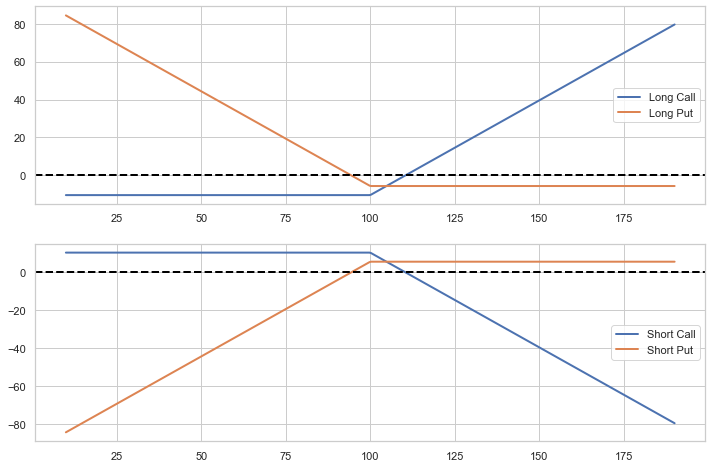

In [138]:
fig, ax = plt.subplots(2, 1)
sT = np.linspace(K-90,K+90,400)
# payoff plot for long call option
ax[0].plot(sT,np.maximum(sT - K, 0) - Call, label='Long Call') 
ax[0].plot(sT, np.maximum(K - sT, 0) - Put, label='Long Put')
ax[0].axhline(0, color='black', linestyle='dashed')
ax[0].legend()

ax[1].plot(sT, Call - np.maximum(sT - K, 0), label='Short Call') 
ax[1].plot(sT, Put - np.maximum(K - sT, 0), label='Short Put')
ax[1].axhline(0, color='black', linestyle='dashed')
ax[1].legend()

# Asian Options 

An Asian option is an option where the payoff depends on the average price of the underlying asset over a certain period of time. Averaging can be either be Arithmetic or Geometric. There are two types of Asian options: **fixed strike**, where averaging price is used in place of underlying price; and **fixed price**, where averaging price is used in place of strike.

### Fixed Strike

To summarise Asian payoffs:

The simple case of an arithmetic average is 
\begin{equation*}
A=\frac{1}{N}\underset{i=1}{\overset{N}{\sum }}S\left( t_{i}\right) .
\end{equation*}
The running average is given by 
\begin{equation*}
A_{i}=\frac{1}{i}\underset{j=1}{\overset{i}{\sum }}S\left( t_{j}\right) 
\end{equation*}
For geometric averaging
\begin{equation*}
G=\left( \underset{i=1}{\overset{N}{\prod }}S\left( t_{i}\right) \right)
^{1/N}
\end{equation*}
It is more common to take natural logs and rearrange as
\begin{equation*}
G=\exp \left( \frac{1}{N}\underset{i=1}{\overset{N}{\sum }}\log S\left(
t_{i}\right) \right) 
\end{equation*}
which is the exponential of the arithmetic average of the log of the stock
prices. 

The payoff of the options is given by

\begin{equation*}
   C_{T} = \max \left [\left (\frac{1}n \underset{i=1}{\overset{n}{\sum }}S_{i} - K)\right), 0\right]
\end{equation*}



\begin{equation*}
   C_{T} = \max (S_{A} - K, 0)
\end{equation*}

where $S_{A}$ is the average price of the underlying asset over the life of the option.  To price an option using a Monte Carlo simulation we use a risk-neutral valuation, where the fair value for a derivative is the expected value of its future payoff. So at any date before maturity, denoted by $t$ , the option's value is the present value of the expectation of its payoff at maturity, $T$.

\begin{equation*}
   C = PV(\mathbb{E}[\max (S_{A}-K, 0)])
\end{equation*}

Under the risk-neutral framework, we assume the asset is going to earn, on average, the risk-free interest rate. Hence, the option value at time $t$ would simply be the discounted value of the expected payoff.

\begin{equation*}
   C= e^{−r(T−t)}\mathbb{E}[\max (S_{A}-K, 0)]
\end{equation*}

In [44]:
# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; r = 0.05; T = 1; t0=0

# Average price
A = S.mean(axis=0)   
    
# Calculate the discounted value of the expeced payoff
A_call = np.exp(-r*(T-t0)) * np.mean(np.maximum(A - K, 0)) # mean is for present value which is for discounting
A_put = np.exp(-r*(T-t0)) * np.mean(np.maximum(K - A, 0))

# Print the values
print(f'Arithmetic mean Asian Call Option Value: {A_call:0.4f}')
print(f'Arithmetic mean Asian Put Option Value: {A_put:0.4f}')

Arithmetic mean Asian Call Option Value: 5.7317
Arithmetic mean Asian Put Option Value: 3.3679


In [45]:
from scipy.stats import gmean

# geometric average price
A_g = gmean(S)   
  
# Calculate the discounted value of the expeced payoff
C0 = np.exp(-r*T) * np.mean(np.maximum(A_g - K, 0)) # mean is for present value which is for discounting
P0 = np.exp(-r*T) * np.mean(np.maximum(K - A_g, 0))

# Print the values
print(f'Geometric mean Asian Call Option Value: {C0:0.4f}')
print(f'Geometric mean Asian Put Option Value: {P0:0.4f}')

Geometric mean Asian Call Option Value: 5.5160
Geometric mean Asian Put Option Value: 3.4868


In [11]:
{(True,)}

{(True,)}

### Floating Strike
The floating strike (or floating rate) Asian call option has the payout
\begin{equation}
C_T = max(S_T - A_T, 0)
\end{equation}
For a put option
\begin{equation}
P_T = max(A_T - S_T, 0)
\end{equation}

In [21]:
# Call the simulation function
S = simulate_path(100, 0.05, 0.20, 1, 252, 100000)

# Define parameters
K = 100.; r = 0.05; T = 1; t0=0

# Average price
A = S.mean(axis=0)   
    
# Calculate the discounted value of the expeced payoff
A_call = np.exp(-r*(T-t0)) * np.mean(np.maximum(S[-1] - A, 0)) # mean is for present value which is for discounting
A_put = np.exp(-r*(T-t0)) * np.mean(np.maximum(A - S[-1], 0))

# Print the values
print(f'Arithmetic mean Asian Call Option Value (Floating Strike): {A_call:0.4f}')
print(f'Arithmetic mean Asian Put Option Value (Floating Strike): {A_put:0.4f}')

Arithmetic mean Asian Call Option Value (Floating Strike): 5.8381
Arithmetic mean Asian Put Option Value (Floating Strike): 3.4099


In [52]:
A_g = gmean(S)   
  
# Calculate the discounted value of the expeced payoff
C0 = np.exp(-r*T) * np.mean(np.maximum(S[-1] - A, 0)) # mean is for present value which is for discounting
P0 = np.exp(-r*T) * np.mean(np.maximum(A - S[-1], 0))

# Print the values
print(f'Geometric mean Asian Call Option Value: {C0:0.4f}')
print(f'Geometric mean Asian Put Option Value: {P0:0.4f}')

Geometric mean Asian Call Option Value: 5.8381
Geometric mean Asian Put Option Value: 3.4099
